# Data in a day


## Import libraries

In [1]:
# requests is for making internet requests (http://docs.python-requests.org/en/master/)
import requests

# 🐼 is to work with tables of data (http://pandas.pydata.org/)
import pandas as pd

# sklearn is for machine learning (http://scikit-learn.org)
from sklearn import linear_model

# matplotlib is to make plots, pandas using it under the hood
# Display plots in this page rather than open another page
%matplotlib inline

## Source the data

Use the firebase API to get the ball dropping data and then store it

In [2]:
response = requests.get('https://newton-decoded.firebaseio.com/falls.json')
json_data = response.text

## Explore and transform the data

Let's have a look at what comes back from the API - it doesn't look very friendly to work with.

In [3]:
json_data

'{"-L7ZzkuY0BKkDcQO2BWN":{"x":2,"y":0.09},"-L7ZzlnER-RJM1JK2HIE":{"x":2.75,"y":0.16000000000000003},"-L7ZzmHeCTLXj2RwTC9P":{"x":1.14,"y":0.04000000000000001},"-L7_DxrKjae43ro7gDLA":{"x":0.8,"y":0.16000000000000003},"-L7_E1uucpsNi2vtyW_i":{"x":1.31,"y":0.36},"-L7_EkI-5DI-T3OQGbdM":{"x":2.47,"y":0.6400000000000001},"-L9K8C87WiA1Xo7G9h_5":{"x":1.46,"y":0.6400000000000001},"-L9K8CiAt0L5bXHWTJSc":{"x":2.54,"y":0.36},"-L9K8EWtVlaM0bdCAsOz":{"x":1.33,"y":0.25}}'

Luckily for us pandas knows how to read JSON and turn it into something more table like - this is called a **dataframe**

In [4]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_json.html
df = pd.read_json(json_data,orient='index')

Let's have a look at the first few rows of our transformed data

In [5]:
df.head()

,x,y
-L7ZzkuY0BKkDcQO2BWN,2.00,0.09
-L7ZzlnER-RJM1JK2HIE,2.75,0.16
-L7ZzmHeCTLXj2RwTC9P,1.14,0.04
-L7_DxrKjae43ro7gDLA,0.80,0.16
-L7_E1uucpsNi2vtyW_i,1.31,0.36


This is better, but ideally we'd like to:
- rename the labels from x and y to something more meaningful i.e. height and time^2
- reset the ball drop id's (e.g. -L7ZzkuY0BKkDcQO2BWN) to 1,2,3... etc

In [6]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html
df= df.rename(columns={'x':'height','y':'time^2'})
df.head()

,height,time^2
-L7ZzkuY0BKkDcQO2BWN,2.00,0.09
-L7ZzlnER-RJM1JK2HIE,2.75,0.16
-L7ZzmHeCTLXj2RwTC9P,1.14,0.04
-L7_DxrKjae43ro7gDLA,0.80,0.16
-L7_E1uucpsNi2vtyW_i,1.31,0.36


In [7]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reset_index.html
df = df.reset_index(drop=True)
df.head()

,height,time^2
0,2.00,0.09
1,2.75,0.16
2,1.14,0.04
3,0.80,0.16
4,1.31,0.36


Perfect! Now let's have a look at some summary stats for our data

In [8]:
df.describe()

,height,time^2
count,9.000000,9.000000
mean,1.755556,0.300000
std,0.701197,0.221303
min,0.800000,0.040000
25%,1.310000,0.160000
50%,1.460000,0.250000
75%,2.470000,0.360000
max,2.750000,0.640000


Now it's time to visualise the data

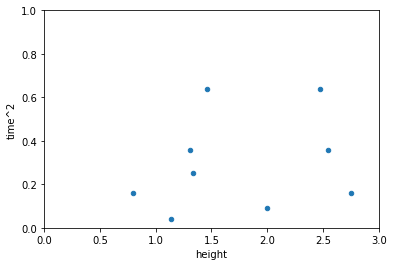

In [9]:
# https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
df.plot.scatter(x='height',y='time^2', xlim=[0,3], ylim=[0,1])

## Building a model

In [10]:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
model = linear_model.LinearRegression()
model.fit(df[['height']],df[['time^2']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Evaluate your model

Now we've built a model we can make predictions. We'll add the results to a new column of our dataframe for convenience

In [11]:
df['prediction'] = model.predict(df[['height']])
df.head()

,height,time^2,prediction
0,2.00,0.09,0.317854
1,2.75,0.16,0.372635
2,1.14,0.04,0.255039
3,0.80,0.16,0.230206
4,1.31,0.36,0.267456


Looking at tables of numbers is not great for humans. Eyeballing the model is a great to get a feel for what we have built

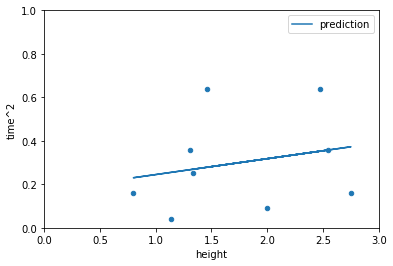

In [12]:
axis1 = df.plot.scatter(x='height',y='time^2', xlim=[0,3], ylim=[0,1])
df.plot.line(x='height',y='prediction', xlim=[0,3], ylim=[0,1], ax=axis1)

We can also be quantitative when we evaluate our predictions by looking at the error between our predictions and our model - using the R-Squared value, 1 is perfect, 0 is terrible.

In [13]:
# http://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination
model.score(df[['height']],df[['time^2']])

0.05355946784220578